# Jupyter Notebook of Carlos Moreno Fernandez

Here is the Jupyter Notebook that you can use to run your code. Remember that you data needs to be uploaded to the GitHub repository before you can use it. I recommend you to upload in the folder called *StudentProjects*.

There are a lot of information on how to use Jupyter Notebook on Internet. Here, I will add a small list of actions:
* Use the *Insert* menu to insert new cells
* Use the *Cell/Cell type* menu to change the style of a given cell: *Code* if you want to add Python code and *Markdown* if you want to add an informative cell
* Each cell can be executed individually. Then I recommend to include limited number of code lines in each of them.
* Use the *Edit* menu to delete cells.
* Remember to save your code once you add it.
* If when you run your code, you have errors due to libraries not included in the repository, please contact me.

If you have questions regarding the environment, please email me or use Teams.

In [33]:
# We would require again the following libraries to manage our dataset
# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
# Pandas: used for data manipulation and analysis
import pandas as pd
import numpy as np
# We will use a new library for machine learning, Scikit-learn. 
# This library allows us to implement easily machine learning models and operations over them. 
# This time we will use the predefined function to scale (min-max normalisation) our data
from sklearn.preprocessing import MinMaxScaler
# we will use the same library to divide our dataset in train and testing
from sklearn.model_selection import train_test_split
# We will import the functions to deal with a linear model.
import sklearn.linear_model as skl_lm
# and a function that calculates the performance
from sklearn.metrics import mean_squared_error
# We will use also another library to plot our model
import matplotlib.pyplot as plt

from matplotlib import pyplot
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder

In [34]:
# header: indicates if the dataset has an initial line with the name of each column
dataset = pd.read_csv('Computer-Hardware-Dataset-data-header.csv', header=0)

In [35]:
dataset

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [36]:
dataset.head(20)

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [37]:
print(dataset.describe())

              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

            CHMAX          PRP          ERP  
count  209.000000   209.000000   209.000000  
mean    18.267943   105.622010    99.330144  
std     25.997318   160.830733   154.757102  
min      0.000000     6.000000    15.000000  
25%      5.000000    27.000000    28.000000  
50%      8.000000    50.000000    45.000000  
75%     24.

In [38]:
#Class Distribution
print(dataset.groupby('Vendor Name').size())

Vendor Name
adviser          1
amdahl           9
apollo           2
basf             2
bti              2
burroughs        8
c.r.d            6
cambex           5
cdc              9
dec              6
dg               7
formation        5
four-phase       1
gould            3
harris           7
honeywell       13
hp               7
ibm             32
ipl              6
magnuson         6
microdata        1
nas             19
ncr             13
nixdorf          3
perkin-elmer     3
prime            5
siemens         12
sperry          13
sratus           1
wang             2
dtype: int64


/srv/conda/envs/notebook/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


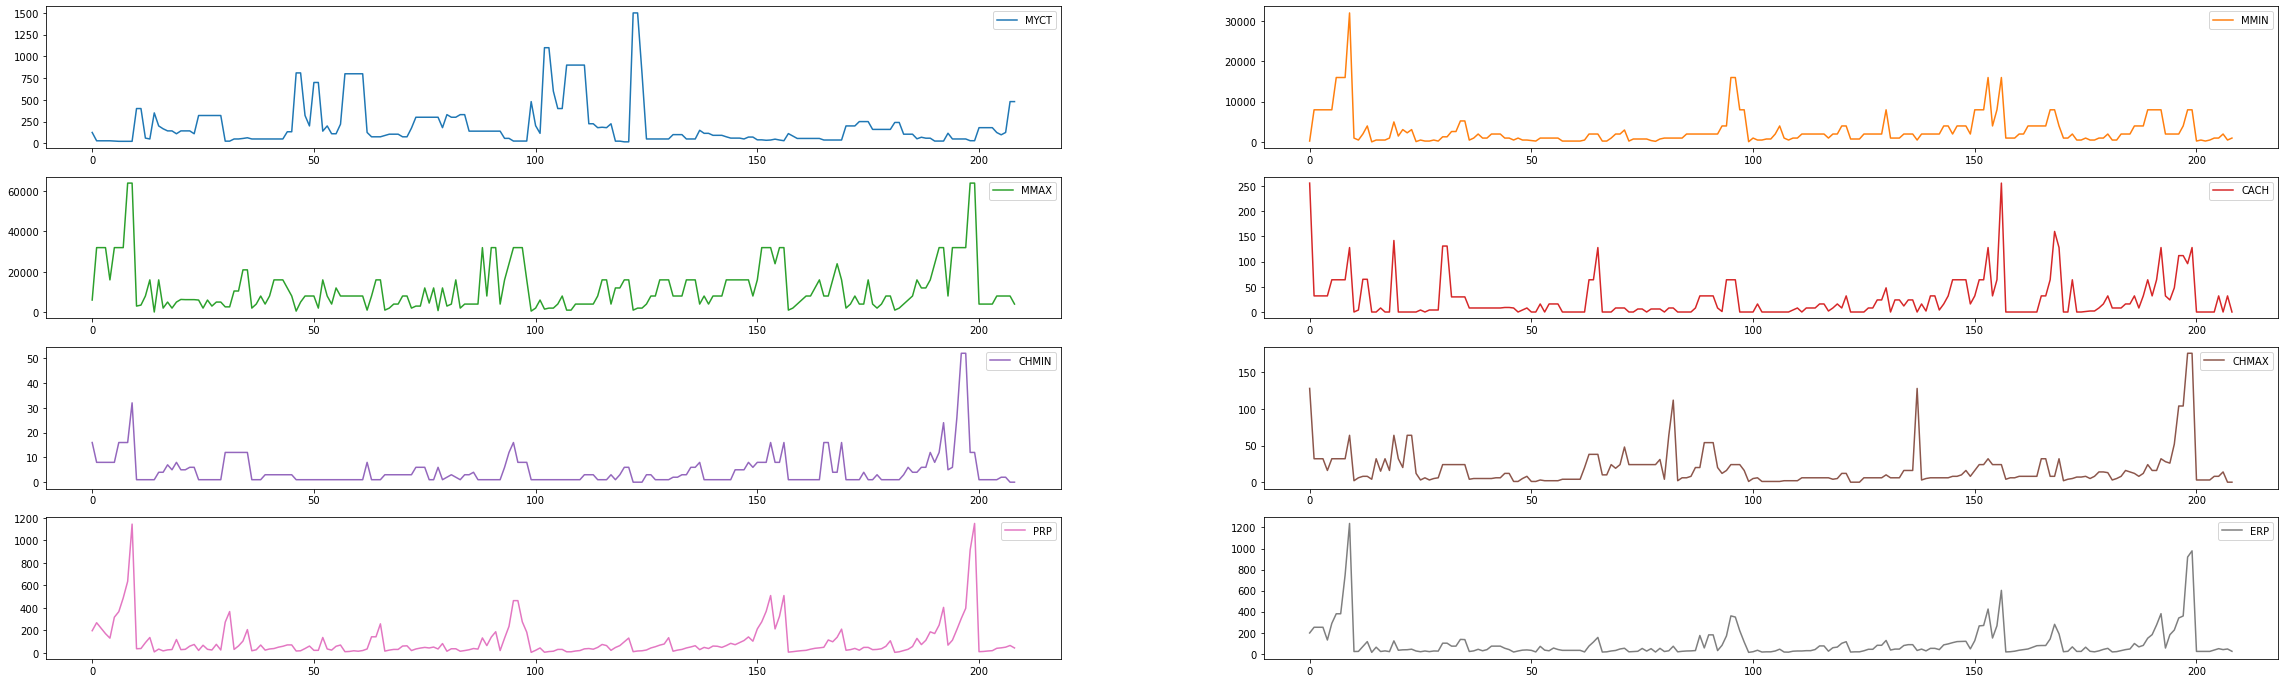

In [39]:
# box and whisker plots
dataset.plot(kind='line', subplots=True, layout=(4,2), sharex=False, sharey=False)
pyplot.rcParams['figure.figsize'] = [40, 12]
pyplot.show()

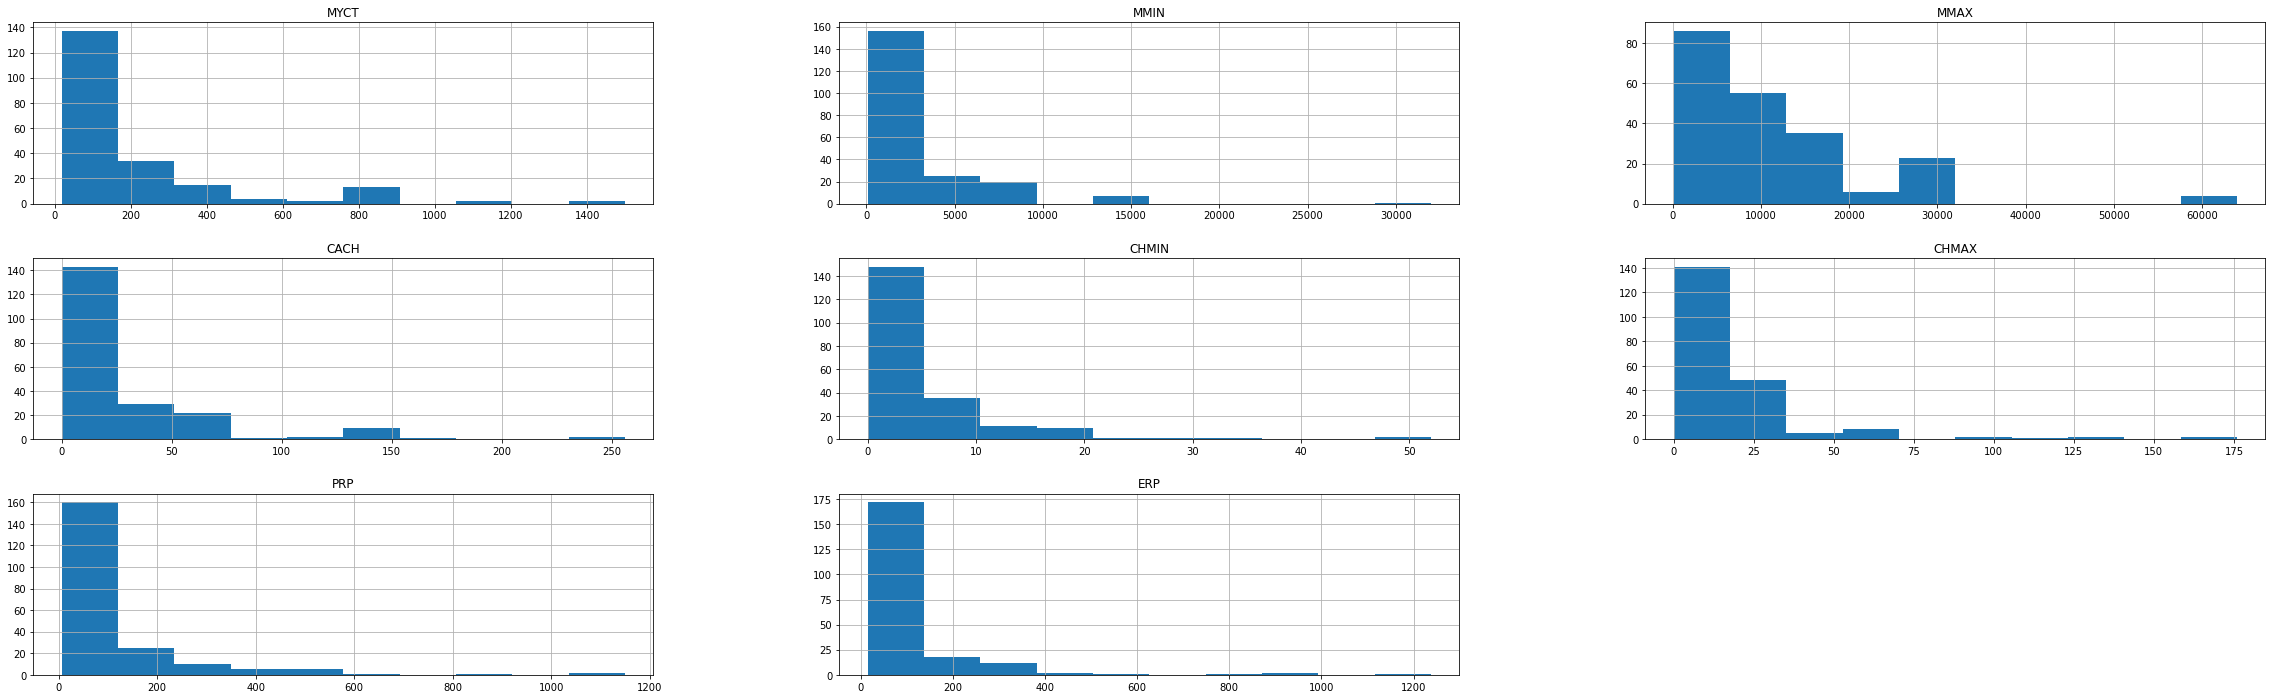

In [40]:
# histograms
dataset.hist()
pyplot.show()

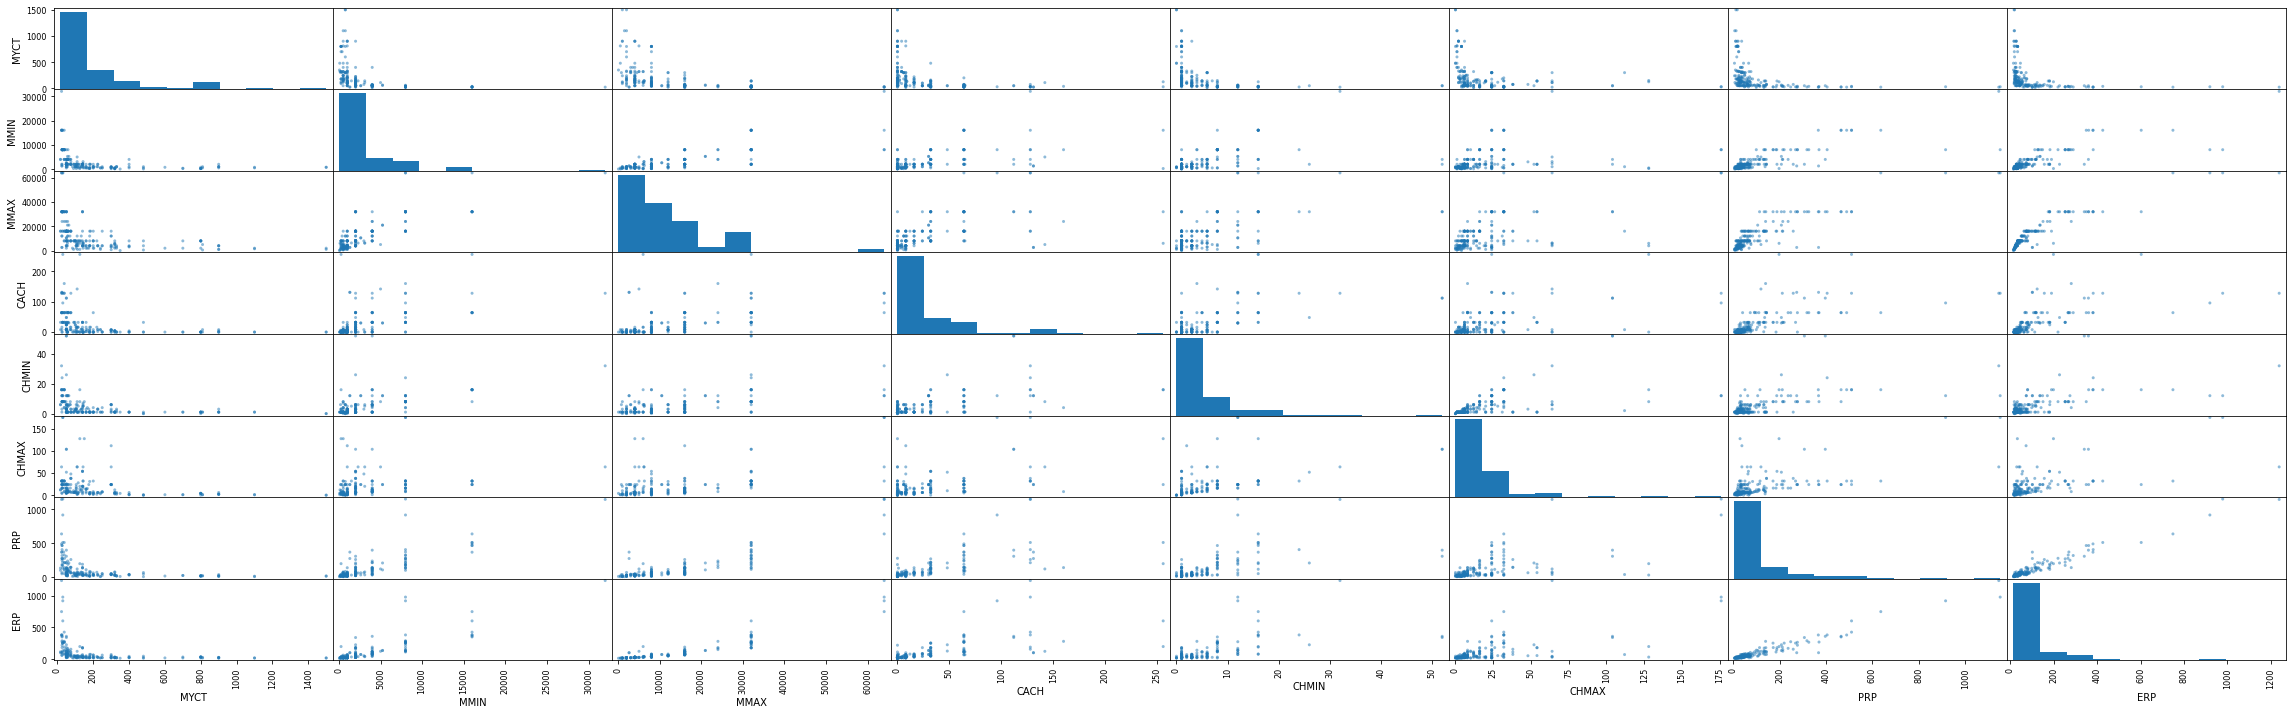

In [41]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [42]:
# Split-out validation dataset
array = dataset.values
X = array[:, 2:9]
Y = array[:, 9]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
print (X)
print (Y)
print (X_train)
print (X_validation)
print (Y_train)
print (Y_validation)

[[125 256 6000 ... 16 128 198]
 [29 8000 32000 ... 8 32 269]
 [29 8000 32000 ... 8 32 220]
 ...
 [125 2000 8000 ... 2 14 52]
 [480 512 8000 ... 0 0 67]
 [480 1000 4000 ... 0 0 45]]
[199 253 253 253 132 290 381 381 749 1238 23 24 70 117 15 64 23 29 22 124
 35 39 40 45 28 21 28 22 28 27 102 102 74 74 138 136 23 29 44 30 41 74 74
 74 54 41 18 28 36 38 34 19 72 36 30 56 42 34 34 34 34 34 19 75 113 157 18
 20 28 33 47 54 20 23 25 52 27 50 18 53 23 30 73 20 25 28 29 32 175 57 181
 181 32 82 171 361 350 220 113 15 21 35 18 20 20 28 45 18 17 26 28 28 31
 31 42 76 76 26 59 65 101 116 18 20 20 30 44 44 82 82 128 37 46 46 80 88
 88 33 46 29 53 53 41 86 95 107 117 119 120 48 126 266 270 426 151 267 603
 19 21 26 35 41 47 62 78 80 80 142 281 190 21 25 67 24 24 64 25 20 29 43
 53 19 22 31 41 47 99 67 81 149 183 275 382 56 182 227 341 360 919 978 24
 24 24 24 37 50 41 47 25]
[[400 2000 4000 ... 1 1 32]
 [180 2000 16000 ... 1 6 66]
 [57 4000 16000 ... 6 12 132]
 ...
 [175 256 2000 ... 3 24 22]
 [92 20

In [45]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
    

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'unknown' instead.